In [22]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

def get_cities_dict():
    cities = ['Пермь', 'Кунгур', 'Москва','Санкт-Перербург','Казань','Уфа','Новосибирск', 'Хабаровск', 'Петрозаводск', 'Карелия']
    driver = webdriver.Firefox()

    urls = {}

    for city in cities:
        query = f'Блюда {city}'

        driver.get("https://ya.ru/")
        time.sleep(30)
        sbox = driver.find_element(By.NAME, 'text')
        sbox.send_keys(query)
        sbox.send_keys(Keys.RETURN)
        time.sleep(5)

        links = driver.find_elements(By.CSS_SELECTOR, "a.Link.organic__url")
        urls[city] = [link.get_attribute('href') for link in links]
    
    driver.quit()

    return urls

In [23]:
cities_dict_tmp = get_cities_dict()
cities_dict_tmp

{'Пермь': ['https://yabs.yandex.ru/count/WeiejI_zOoVX2LcA0kqJ04EaYKqvhqCl0juA2EWWcA3Fvt9dp_OxTxxhQ-VhTxpUS8UBGwNHwGrzIgDtD7ywdrBf5Ffyuj8eFiMbpwVzdDf2D8o4YfPeS7V0b4q4cd19il5IAc4mh7Mm-u11nt79YPUEkSJ67LWwMmU0J4xwCDjorSRaSAKq5y83LgmKe7t0Yc81sWUiL2b0-m0K7GLe7u02LO3s0IXF1MWVWE9KWFO1A4q5Q5KiCSlvceWaLsdmykdBwIOrKJJo8Um_U3stq0Ft6RLhwb0Dw1Dgsr8d3iMdpYVKUK_hN0frudVKpdCyns-flG876mCDRGqyX0eFo1klX_I2apg38hVbTRDZ3IcneyI9y_c6oSPRjTbzODi6S8ODN5zbbVPa2fS_EISlMWrxCmuB5gs6BOSTWkP9B-_OJiFrDDi7e3W5iCMm5y4HrBkZ8gGBsyF2rW5TPveXqs5D7deKjfw23ZEXRC6BYnL3Ze7IiM0cNTzZn3v6fm05GzO08_uwp3S4kaWCiYCO331T7BSG6fJ8V01DlMgJMstk7Bu0V_Y7oDu7X_Xo_byEL5ZVou4AwtDnkB3ztMkPaNtj1ufPVlO3nInCyrBio2mlnOvC87eLCiwSc4llE7DYBhrbuSiUoPvTe2Tx9M_Zi1_J7ep0qnOXrdzpzEsrYVajhUkwPDzUcvZNUYJVCaL4d_LUzsPgTv5MNPZk7ezePgvKAfKoPAmvRQ_hEePbbF9BS4L4e0HjHSuQ_D89ZOFEhwfF_Xkw8-IKTqsYRjeZGLFVfmph0yNseT7JLnJnTR_w37l3uKbtqnnnCOuhD--Zelrfk7KzwNX0vmvQ0C7ImWqR3LgBHZXa9OiIk040~2?etext=2202._W_cV_cs8TpMKHP1OHIBYxrCzKb87i2dRbGN8PL5W3NsaWhidnJkZXV6emp1Zmhh.5a625d35

In [24]:
import requests
from bs4 import BeautifulSoup

def fetch_dishes():
    base_url = 'https://ru.wikipedia.org/wiki/Категория:Блюда_по_алфавиту'
    url = base_url
    dishes = []

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # блюда со страницы
        for link in soup.select('.mw-category-group ul li a'):
            dishes.append(link.text)

        next_page = soup.select_one('a:contains("Следующая страница")')
        url = 'https://ru.wikipedia.org' + next_page['href'] if next_page else None

    print(dishes)
    return dishes

In [25]:
dishes_tmp = fetch_dishes()

['Абон', 'Абрикосовые клёцки', 'Абхазури', 'Авголемоно', 'Агнес Бернауэр (торт)', 'Агуапанела', 'Агуачиле', 'Агэмоти', 'Аджапсандали', 'Аджика', 'Аджилы эзме', 'Адобо (филиппинская кухня)', 'Азу', 'Айвар', 'Айвовый мармелад', 'Айвовый хлеб', 'Айнтопф', 'Айоли', 'Айсбайн', 'Аканес', 'Акараже', 'Аквакотта', 'Аки и солёная рыба', 'Акутак', 'Алани', 'Алетрия', 'Алиго', 'Алйотта', 'Аль пастор', 'Альба (блюдо)', 'Альмогроте', 'Альфахор', 'Альята', 'Аманатто', 'Амаретто (печенье)', 'Амасти', 'Аматричана', 'Американское парфе', 'Амич', 'Аммицу', 'Ампо (блюдо)', 'Ан-пан', 'Ангелы на лошадях', 'Английский крем', 'Английский маффин', 'Английский пирог с миногами', 'Ангулас', 'Андалузский соус', 'Андуйет', 'Анзак (печенье)', 'Анис де Флавиньи', 'Анковский пирог', 'Аннин-тофу', 'Антикучо', 'Антипасто', 'Антрекот', 'Аньолотти', 'Аодзиру', 'Апио (блюдо)', 'Апфелькюхле', 'Арабский рис', 'Аранчини', 'Арахисовое рагу', 'Арахисовый пирог', 'Арахисовый соус', 'Арахисовый суп', 'Арем-арем', 'Арепа', 'Аризо

In [35]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()
def lemmatize_text(text : str) -> set:
    words = text.split()
    res = set()
    for word in words:
        p = morph.parse(word)[0]
        res.add(p.normal_form)
    return res

In [27]:
def fetch_page(url, retries=3, timeout=20) -> requests.Response | None:
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=timeout)
            response.raise_for_status()
            return response
        except requests.exceptions.Timeout:
            print(f'Timeout exceed, it was try #{attempt+1}')
            time.sleep(2)
        except requests.exceptions.RequestException as e:
            print(f'Ошибка запроса: {e}')
            break
    return None

In [28]:
def chunk_text(text : str, chunk_length = 10000):
    sentenses = text.split(' ')

    chunks = []
    current_chunk = []
    current_length = 0

    for word in sentenses:
        current_chunk.append(word)
        current_length += len(word)

        if (current_length >  chunk_length):
            chunks.append(str.join(' ',current_chunk))
            current_chunk = []
            current_length = 0

    if current_chunk:
        chunks.append(str.join(' ',current_chunk))

    return chunks

In [33]:
def find_dishes_on_page(url, dishes):
    response = fetch_page(url)
    if response is None:
        print(f'Ошибка при получении данных: {url}')
        return {}
    
    soup = BeautifulSoup(response.text, 'html.parser')
    page_text = soup.get_text()

    text_chunks = chunk_text(page_text)

    lemmatized = set()

    for chunk in text_chunks:
        lemmatized.update(lemmatize_text(chunk))

    dishes_frequency = {dish : 0 for dish in dishes}

    for dish in dishes:
        dish_lemma = lemmatize_text(dish)
        if dish_lemma.intersection(lemmatized):
            dishes_frequency[dish] += 1

    return dishes_frequency

In [30]:
def normalize_freq(dishes_frequency, total_pages):
    return {dish: count / total_pages if total_pages > 0 else 0
                              for dish, count in dishes_frequency.items()}

In [31]:
def process_city_links():
    cities_dict = cities_dict_tmp # get_cities_dict()
    dishes = dishes_tmp # fetch_dishes()
    for city, links in cities_dict.items():
        print(f'Город: {city}')
        dish_counts = {dish: 0 for dish in dishes}

        for link in links:
            print(f'Обработка страницы: {link}')
            page_dish_count = find_dishes_on_page(link, dishes)
            for dish, count in page_dish_count.items():
                dish_counts[dish] += count

        cities_dict[city] = normalize_freq(dish_counts, len(links))
    
    return cities_dict


In [36]:
import pandas as pd

city_vectors = pd.DataFrame(process_city_links()).T.fillna(0)
city_vectors

Город: Пермь
Обработка страницы: https://yabs.yandex.ru/count/WeiejI_zOoVX2LcA0kqJ04EaYKqvhqCl0juA2EWWcA3Fvt9dp_OxTxxhQ-VhTxpUS8UBGwNHwGrzIgDtD7ywdrBf5Ffyuj8eFiMbpwVzdDf2D8o4YfPeS7V0b4q4cd19il5IAc4mh7Mm-u11nt79YPUEkSJ67LWwMmU0J4xwCDjorSRaSAKq5y83LgmKe7t0Yc81sWUiL2b0-m0K7GLe7u02LO3s0IXF1MWVWE9KWFO1A4q5Q5KiCSlvceWaLsdmykdBwIOrKJJo8Um_U3stq0Ft6RLhwb0Dw1Dgsr8d3iMdpYVKUK_hN0frudVKpdCyns-flG876mCDRGqyX0eFo1klX_I2apg38hVbTRDZ3IcneyI9y_c6oSPRjTbzODi6S8ODN5zbbVPa2fS_EISlMWrxCmuB5gs6BOSTWkP9B-_OJiFrDDi7e3W5iCMm5y4HrBkZ8gGBsyF2rW5TPveXqs5D7deKjfw23ZEXRC6BYnL3Ze7IiM0cNTzZn3v6fm05GzO08_uwp3S4kaWCiYCO331T7BSG6fJ8V01DlMgJMstk7Bu0V_Y7oDu7X_Xo_byEL5ZVou4AwtDnkB3ztMkPaNtj1ufPVlO3nInCyrBio2mlnOvC87eLCiwSc4llE7DYBhrbuSiUoPvTe2Tx9M_Zi1_J7ep0qnOXrdzpzEsrYVajhUkwPDzUcvZNUYJVCaL4d_LUzsPgTv5MNPZk7ezePgvKAfKoPAmvRQ_hEePbbF9BS4L4e0HjHSuQ_D89ZOFEhwfF_Xkw8-IKTqsYRjeZGLFVfmph0yNseT7JLnJnTR_w37l3uKbtqnnnCOuhD--Zelrfk7KzwNX0vmvQ0C7ImWqR3LgBHZXa9OiIk040~2?etext=2202._W_cV_cs8TpMKHP1OHIBYxrCzKb87i2dRbGN8PL5W3NsaWhidnJk

,Абон,Абрикосовые клёцки,Абхазури,Авголемоно,Агнес Бернауэр (торт),Агуапанела,Агуачиле,Агэмоти,Аджапсандали,Аджика,Аджилы эзме,Адобо (филиппинская кухня),Азу,Айвар,Айвовый мармелад,Айвовый хлеб,Айнтопф,Айоли,Айсбайн,Аканес,Акараже,Аквакотта,Аки и солёная рыба,Акутак,Алани,Алетрия,Алиго,Алйотта,Аль пастор,Альба (блюдо),Альмогроте,Альфахор,Альята,Аманатто,Амаретто (печенье),Амасти,Аматричана,Американское парфе,Амич,Аммицу,...,Юха (хлеб),Яблоки в тесте,Яблочное пюре,Яблочный хрен,Яворовский пирог,Яичная кашка,Яичница,Яичное масло,Яичный тарт,Яйла чорбасы,Яйца Бенедикт,Яйца в горчичном соусе,Яйца по-русски,Яйца по-флорентийски,Яйца с мозгами,Яйца Сарду,Яйцо в корзине,Яйцо кокот,Яйцо пашот,Яйцо по-шотландски,Якисоба,Якитори,Яксик,Ямайский пирожок,Янтык (блюдо),Японский суфле-чизкейк,Японское карри,Япчик,Ясса (блюдо),Ятернице,Яхния,Яцухаси,Ячневая каша,Blote billetjes in het gras,Cocio,Cup Noodles,Jelly Babies,LPG-пирог,Mon Chéri,Сиратаки
Пермь,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.117647,0.0,0.000000,0.0,0.0,0.0,0.0,0.705882,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,...,0.0,0.588235,0.058824,0.000000,0.176471,0.058824,0.000000,0.176471,0.058824,0.0,0.235294,0.588235,0.235294,0.235294,0.529412,0.235294,0.588235,0.235294,0.235294,0.235294,0.0,0.0,0.0,0.294118,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0,0.000000,0.0
Кунгур,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.555556,0.055556,0.000000,0.111111,0.055556,0.000000,0.277778,0.055556,0.0,0.166667,0.555556,0.166667,0.166667,0.500000,0.166667,0.555556,0.166667,0.166667,0.166667,0.0,0.0,0.0,0.055556,0.0,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Москва,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.111111,0.0,0.055556,0.0,0.0,0.0,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,...,0.0,0.833333,0.388889,0.388889,0.055556,0.111111,0.055556,0.500000,0.111111,0.0,0.333333,0.833333,0.333333,0.333333,0.833333,0.333333,0.833333,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.166667,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.277778,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0
Санкт-Перербург,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,...,0.0,0.647059,0.117647,0.117647,0.117647,0.235294,0.000000,0.294118,0.294118,0.0,0.294118,0.647059,0.294118,0.294118,0.647059,0.294118,0.647059,0.294118,0.294118,0.294118,0.0,0.0,0.0,0.058824,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.176471,0.058824,0.0,0.0,0.0,0.0,0.058824,0.0
Казань,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.1875,0.0,0.0,0.125000,0.0,0.000000,0.0,0.0,0.0,0.0,0.812500,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,...,0.0,0.812500,0.125000,0.000000,0.375000,0.000000,0.000000,0.312500,0.000000,0.0,0.125000,0.812500,0.125000,0.125000,0.812500,0.125000,0.812500,0.125000,0.125000,0.125000,0.0,0.0,0.0,0.437500,0.0,0.062500,0.062500,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Уфа,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.176471,0.0,0.000000,0.0,0.0,0.0,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,...,0.0,0.764706,0.235294,0.000000,0.176471,0.058824,0.000000,0.176471,0.058824,0.0,0.176471,0.764706,0.235294,0.176471,0.647059,0.176471,0.764706,0.176471,0.176471,0.176471,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0,0.0,0.176471,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0

In [37]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
clusters_count = 8
kmeans  = KMeans(n_clusters=clusters_count, random_state=42)

city_vectors['kmeans_cluster'] = kmeans.fit_predict(city_vectors)

agg_clustering = AgglomerativeClustering(n_clusters=clusters_count)
city_vectors['hierarchical_cluster'] = agg_clustering.fit_predict(city_vectors)

spectral_clustering = SpectralClustering(n_clusters=clusters_count, random_state=42, affinity='nearest_neighbors', n_neighbors=2)
city_vectors['spectral_cluster'] = spectral_clustering.fit_predict(city_vectors)

print(city_vectors[['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']])

                 kmeans_cluster  hierarchical_cluster  spectral_cluster
Пермь                         6                     7                 2
Кунгур                        1                     0                 1
Москва                        4                     5                 0
Санкт-Перербург               0                     4                 6
Казань                        5                     3                 5
Уфа                           2                     6                 6
Новосибирск                   1                     0                 1
Хабаровск                     7                     2                 7
Петрозаводск                  1                     0                 3
Карелия                       3                     1                 4


/home/lolomarka/Documents/web-analysis/.venv/lib64/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


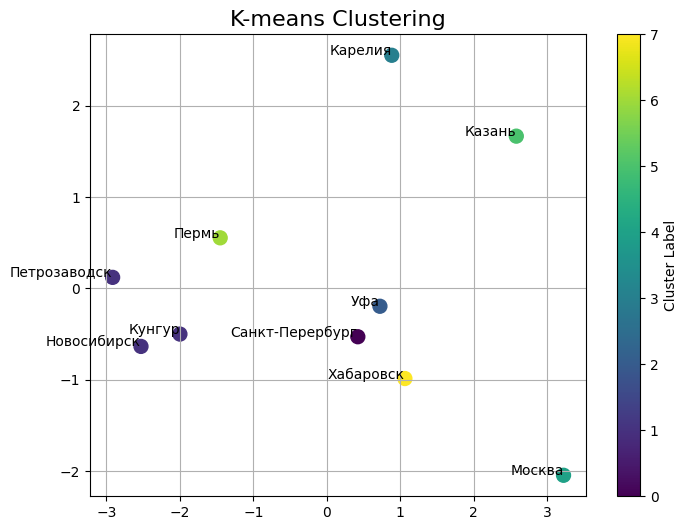

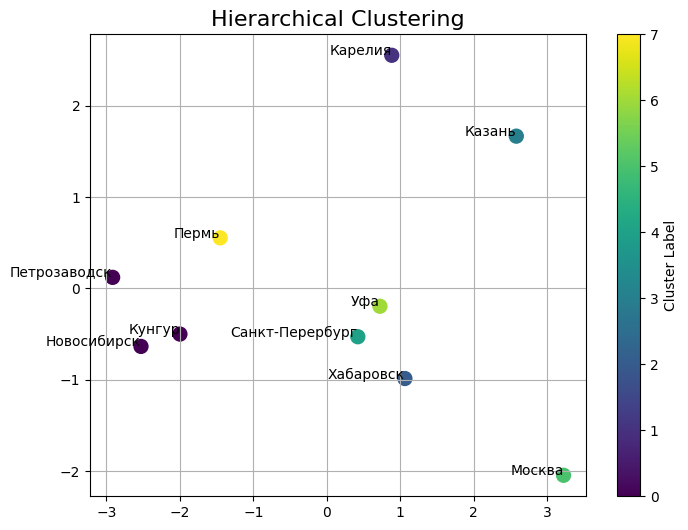

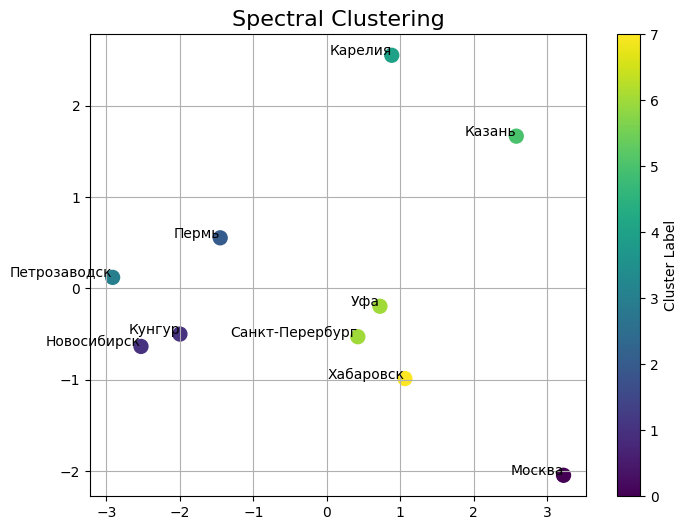

In [38]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(city_vectors.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']))

def plot_clusters(reduced_data, labels, title, cities):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=100)
    plt.title(title, fontsize=16)
    for i, city in enumerate(cities):
        plt.text(reduced_data[i, 0], reduced_data[i, 1], city, fontsize=10, ha='right')
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

plot_clusters(reduced_data, city_vectors['kmeans_cluster'], 'K-means Clustering', city_vectors.index)
plot_clusters(reduced_data, city_vectors['hierarchical_cluster'], 'Hierarchical Clustering', city_vectors.index)
plot_clusters(reduced_data, city_vectors['spectral_cluster'], 'Spectral Clustering', city_vectors.index)